In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

import pickle
from CONSTANTS import *
from Utils.helpers import *

## Raw Correlations

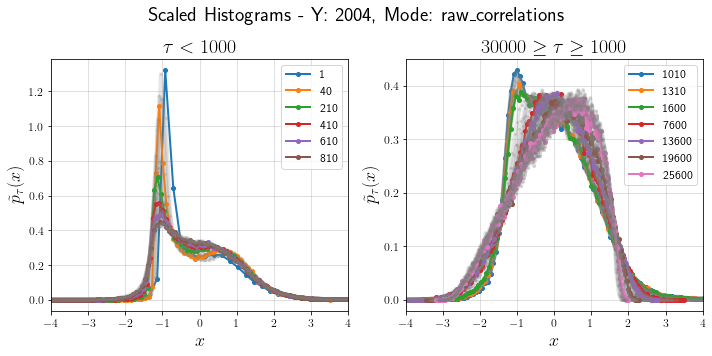

In [4]:
for year in years[:1]:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.rc('text', usetex=True)

    X_small = []
    y_small = []
    labels_small = []
    
    X_big = []
    y_big = []
    labels_big = []
    
    for tau in taus:
        mode = "raw_correlations"
        with open(f"{path}Histograms/hist_{mode}_{year}_{tau}.pkl", "rb") as f:
            response = pickle.load(f)

        if tau < plotting_tau_cutoff:
            X_small.append(response["x"])
            y_small.append(response["y"])
            labels_small.append(f"{tau}")
        elif tau < plotting_tau_upper_bound:
            X_big.append(response["x"])
            y_big.append(response["y"])
            labels_big.append(f"{tau}")
            
    axs[0] = plot(X_small, y_small, labels_small, r"$x$", r"$\tilde{p}_\tau (x)$", r"$\tau < 1000$", highlight_x = None, dpi=300, log_x = False, log_y = False, axes = axs[0]) 
    axs[1] = plot(X_big, y_big, labels_big, r"$x$", r"$\tilde{p}_\tau (x)$", r"$30000 \ge \tau \ge 1000$", highlight_x = None, dpi=300, log_x = False, log_y = False, axes = axs[1])       
    fig.suptitle(f"Scaled Histograms - Y: {year}, Mode: {mode}", fontsize=20)
    plt.tight_layout()
    plt.show()   

## Shifted by Market Mode

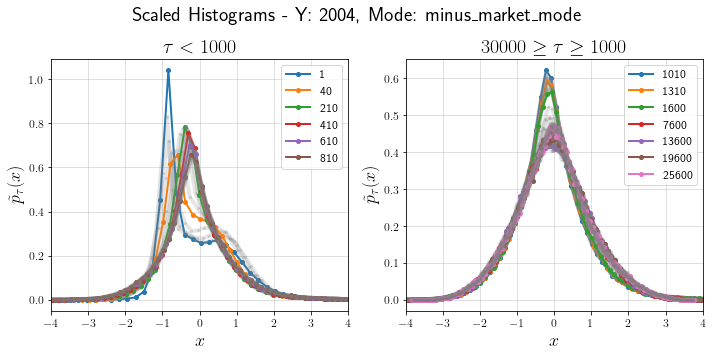

In [5]:
for year in years[:1]:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.rc('text', usetex=True)

    X_small = []
    y_small = []
    labels_small = []
    
    X_big = []
    y_big = []
    labels_big = []
    
    for tau in taus:
        mode = "minus_market_mode"
        with open(f"{path}Histograms/hist_{mode}_{year}_{tau}.pkl", "rb") as f:
            response = pickle.load(f)

        if tau < plotting_tau_cutoff:
            X_small.append(response["x"])
            y_small.append(response["y"])
            labels_small.append(f"{tau}")
        elif tau < plotting_tau_upper_bound:
            X_big.append(response["x"])
            y_big.append(response["y"])
            labels_big.append(f"{tau}")
            
    axs[0] = plot(X_small, y_small, labels_small, r"$x$", r"$\tilde{p}_\tau (x)$", r"$\tau < 1000$", highlight_x = None, dpi=300, log_x = False, log_y = False, axes = axs[0]) 
    axs[1] = plot(X_big, y_big, labels_big, r"$x$", r"$\tilde{p}_\tau (x)$", r"$30000 \ge \tau \ge 1000$", highlight_x = None, dpi=300, log_x = False, log_y = False, axes = axs[1])       
    fig.suptitle(f"Scaled Histograms - Y: {year}, Mode: {mode}", fontsize=20)
    plt.tight_layout()
    plt.show()

## Partial Correlations

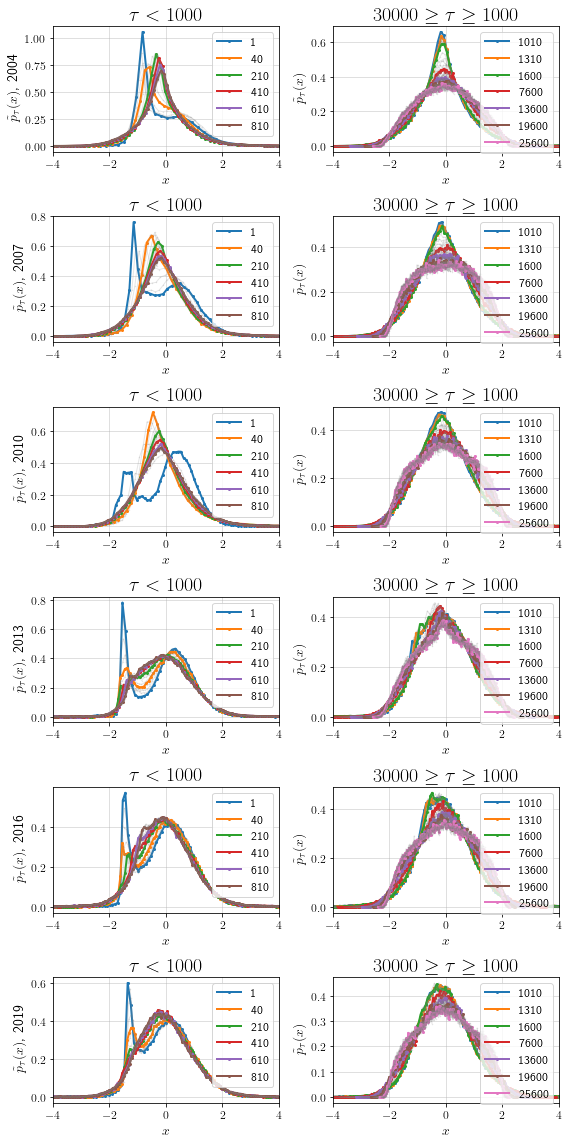

In [28]:
fig, axs = plt.subplots(6, 2, figsize=(8, 16))
for i,year in enumerate([2004,2007,2010,2013,2016,2019]):
    plt.rc('text', usetex=True)

    X_small = []
    y_small = []
    labels_small = []
    
    X_big = []
    y_big = []
    labels_big = []
    
    for tau in taus:
        mode = "normalized"
        with open(f"{path}Histograms/hist_{mode}_{year}_{tau}.pkl", "rb") as f:
            response = pickle.load(f)

        if tau < plotting_tau_cutoff:
            X_small.append(response["x"])
            y_small.append(response["y"])
            labels_small.append(f"{tau}")
        elif tau < plotting_tau_upper_bound:
            X_big.append(response["x"])
            y_big.append(response["y"])
            labels_big.append(f"{tau}")
    

    axs[i][0] = plot(X_small, y_small, labels_small, r"$x$", r"$\tilde{p}_\tau (x)$" + f", {year}", r"$\tau < 1000$", highlight_x = None, dpi=300, log_x = False, log_y = False, axes = axs[i][0]) 
    axs[i][1] = plot(X_big, y_big, labels_big, r"$x$", r"$\tilde{p}_\tau (x)$", r"$30000 \ge\tau \ge 1000$", highlight_x = None, dpi=300, log_x = False, log_y = False, axes = axs[i][1])       
    #fig.suptitle(f"Scaled Histograms - Y: {year}, Mode: {mode}", fontsize=20)

# for ax in plt.gcf().axes:
#     try:
#         ax.label_outer()
#     except:
#         pass
plt.tight_layout()
plt.savefig("scaled_histograms.pdf", bbox_inches='tight')
plt.show()